In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\kellya\Documents\Python Code\python_for_coaches-main\python_for_coaches-main\Learning\december_data_science\day_1_files\CONTENT_INTERACTION\ViewingActivity.csv')

### Explore the df shape/content

In [2]:
df.shape

(9207, 10)

In [3]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,#whoruntheworld,2022-12-01 03:05:06,00:43:51,NaN,Wednesday: Season 1: Woe Is the Loneliest Numb...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:43:51,00:43:51,US (United States)
1,#whoruntheworld,2022-12-01 02:06:34,00:56:03,NaN,Wednesday: Season 1: Wednesday's Child Is Full...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:55:19,00:55:19,US (United States)
2,#whoruntheworld,2022-11-30 18:01:32,00:00:09,Autoplayed: user action: None;,Season 1 Clip: Snack VS. Chef,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:09,00:00:09,US (United States)
3,#whoruntheworld,2022-11-30 17:56:22,00:04:54,NaN,Our Universe: Season 1: Chasing Starlight (Epi...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:04:54,00:04:54,US (United States)
4,#whoruntheworld,2022-11-30 17:56:00,00:00:04,Autoplayed: user action: None;,Season 1 Clip: Snack VS. Chef,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:04,Not latest view,US (United States)


In [4]:
df.sample(n=10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
1350,#whoruntheworld,2022-02-19 23:12:04,00:00:08,NaN,CoComelon: Season 4: CoComelon Fun Club (Episo...,NaN,DefaultWidevineAndroidPhone,00:00:08,Not latest view,US (United States)
5552,#whoruntheworld,2019-11-23 02:25:50,00:21:55,NaN,Friends: Season 2: The One with Barry and Mind...,NaN,Android DefaultWidevineL3Phone Android Phone,00:22:36,00:22:36,US (United States)
376,#whoruntheworld,2022-09-04 01:15:26,00:00:05,Autoplayed: user action: None;,Trailer: Devil in Ohio,TRAILER,Netflix Windows App - Cadmium Windows Mobile,00:00:05,00:00:05,US (United States)
2106,#whoruntheworld,2021-10-18 11:30:14,00:24:04,NaN,The Great British Baking Show: Collection 1: D...,NaN,DefaultWidevineAndroidPhone,00:52:37,00:52:37,US (United States)
2991,#whoruntheworld,2021-07-30 13:48:02,00:00:05,NaN,Trailer: The Last Mercenary,TRAILER,DefaultWidevineAndroidPhone,00:00:04,00:00:04,GB (United Kingdom)
8361,Adam Portuguese,2021-11-12 12:28:36,00:10:44,NaN,Spirit - Cavalgando Livre: Academia de Equitaç...,NaN,Google Chromecast V3 Streaming Stick,00:10:44,Not latest view,US (United States)
7772,Adam & Nicole,2020-02-09 14:13:31,00:43:38,NaN,Jane The Virgin: Season 5: Chapter One Hundred...,NaN,Google Chromecast V3 Streaming Stick,00:43:38,00:43:38,US (United States)
4040,#whoruntheworld,2020-11-24 18:21:44,00:00:41,NaN,The Great British Baking Show: Collection 8: J...,NaN,DefaultWidevineAndroidPhone,00:00:45,Not latest view,US (United States)
5241,#whoruntheworld,2020-02-01 02:20:26,00:41:05,NaN,Tiny House Nation: Volume 2: Going Tiny in the...,NaN,Google Chromecast V3 Streaming Stick,00:41:05,Not latest view,US (United States)
3955,#whoruntheworld,2020-12-22 01:32:41,00:17:25,NaN,Tiny Pretty Things: Season 1: Dance Dance Revo...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:52:51,00:52:51,US (United States)


In [5]:
df["Profile Name"].unique()

array(['#whoruntheworld', 'Adam & Nicole', 'Adam Portuguese', 'Harper',
       'Kids'], dtype=object)

In [6]:
df["Device Type"].unique()

array(['Netflix Windows App - Cadmium Windows Mobile',
       'Android DefaultWidevineL3Phone Android Phone',
       'DefaultWidevineAndroidPhone',
       'Google Chromecast V3 Streaming Stick',
       'Google Chromecast streaming stick',
       'Google Smart Display Nest Hub 2018', 'Firefox PC (Cadmium)',
       'Edge OSS - Windows (Cadmium)', 'Chrome PC (Cadmium)',
       'Samsung 2015 NT14M DTV Smart TV'], dtype=object)

### Possible Questions for Data
##### Which Profile watched the most (time)?
##### Which Profile has the most watching activities/interactions?
##### What is the average watching time (per Profile)?
##### What devices are used by which Profile? And which device is used the most?
##### What was the most popular/watched title?

## Transform the data

In [7]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [8]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [9]:
df.sample(n=10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8723,Adam Portuguese,2020-04-07 23:05:13+00:00,0 days 00:01:58,NaN,Pokémon - A Série: Liga Índigo: Temporada 1: P...,NaN,Google Chromecast V3 Streaming Stick,00:15:14,Not latest view,US (United States)
388,#whoruntheworld,2022-09-01 01:42:00+00:00,0 days 00:42:52,NaN,"Lucifer: Season 1: Lucifer, Stay. Good Devil. ...",NaN,Netflix Windows App - Cadmium Windows Mobile,00:42:52,00:42:52,US (United States)
130,#whoruntheworld,2022-11-11 19:50:12+00:00,0 days 00:32:39,NaN,Warrior Nun: Season 1: Matthew 7:13 (Episode 5),NaN,Android DefaultWidevineL3Phone Android Phone,00:32:21,Not latest view,US (United States)
3989,#whoruntheworld,2020-12-15 03:23:54+00:00,0 days 00:00:04,NaN,We Are the Champions: Season 1: Yo-Yo (Episode 4),NaN,DefaultWidevineAndroidPhone,00:26:03,00:26:03,US (United States)
6580,Adam & Nicole,2021-12-14 02:03:02+00:00,0 days 00:23:09,NaN,Heartland: Season 6: The Road Ahead (Episode 10),NaN,Google Chromecast V3 Streaming Stick,00:43:42,00:43:42,US (United States)
3793,#whoruntheworld,2021-01-30 15:45:02+00:00,0 days 00:40:26,NaN,Imposters: Season 1: In the Game (Episode 8),NaN,DefaultWidevineAndroidPhone,00:41:45,00:41:45,US (United States)
3810,#whoruntheworld,2021-01-28 17:41:35+00:00,0 days 00:00:08,NaN,A California Christmas,NaN,DefaultWidevineAndroidPhone,00:00:27,Not latest view,US (United States)
4150,#whoruntheworld,2020-10-26 00:07:15+00:00,0 days 00:16:00,NaN,Cowboys & Aliens,NaN,DefaultWidevineAndroidPhone,00:16:00,00:16:00,GB (United Kingdom)
5833,#whoruntheworld,2019-09-19 14:00:02+00:00,0 days 00:38:59,NaN,The I-Land: Limited Series: Many Goodly Creatu...,NaN,Android DefaultWidevineL3Phone Android Phone,00:38:59,00:38:59,US (United States)
1960,#whoruntheworld,2021-11-22 05:06:12+00:00,0 days 00:08:24,NaN,Headspace Guide to Sleep: Season 1: How to Sle...,NaN,Android DefaultWidevineL3Phone Android Phone,00:14:55,Not latest view,US (United States)


## Answer Questions & Visualize the data

### Which Profile has the most watching activities/interactions?

In [10]:
df['Profile Name'].value_counts()

#whoruntheworld    5972
Adam & Nicole      2281
Adam Portuguese     482
Harper              461
Kids                 11
Name: Profile Name, dtype: int64

##### It appears that #whoruntheworld profile has the most view records.

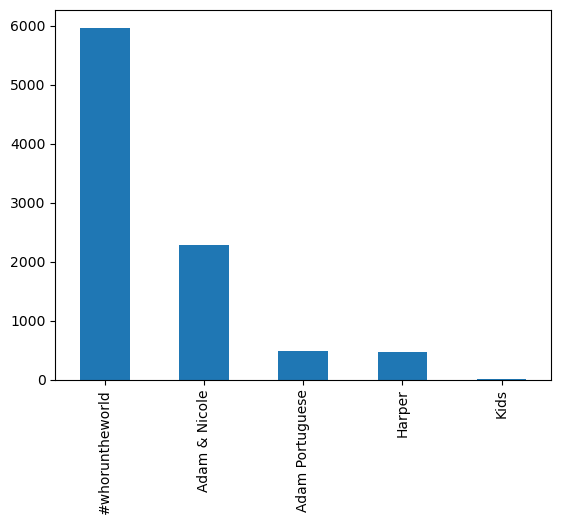

In [11]:
df['Profile Name'].value_counts().plot(kind='bar')
plt.show()

##### Which profile watched the most (time)?

In [12]:
df.Duration.sum()

Timedelta('147 days 02:56:47')

In [13]:
df.sort_values('Start Time')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8252,Adam & Nicole,2019-08-08 22:52:58+00:00,0 days 00:00:36,NaN,Marvel's Agents of S.H.I.E.L.D.: Season 2: Sha...,NaN,Android DefaultWidevineL3Phone Android Phone,00:00:36,00:00:36,US (United States)
8251,Adam & Nicole,2019-08-08 22:59:51+00:00,0 days 00:02:24,NaN,Arrow: Season 5: Lian Yu (Episode 23),NaN,Android DefaultWidevineL3Phone Android Phone,00:02:24,00:02:24,US (United States)
8250,Adam & Nicole,2019-08-08 23:05:59+00:00,0 days 00:42:30,NaN,Marvel's Agents of S.H.I.E.L.D.: Season 1: T.R...,NaN,Google Chromecast V3 Streaming Stick,00:42:30,00:42:30,US (United States)
8249,Adam & Nicole,2019-08-08 23:50:50+00:00,0 days 00:08:13,NaN,Marvel's Agents of S.H.I.E.L.D.: Season 1: T.A...,NaN,Google Chromecast V3 Streaming Stick,00:08:59,Not latest view,US (United States)
5971,#whoruntheworld,2019-08-09 02:53:18+00:00,0 days 00:44:12,NaN,Queer Eye: Season 4: Without Further Ado (Epis...,NaN,Android DefaultWidevineL3Phone Android Phone,00:44:13,Not latest view,US (United States)
...,...,...,...,...,...,...,...,...,...,...
8739,Harper,2022-12-01 13:30:41+00:00,0 days 00:00:02,NaN,Spirit Riding Free: Season 7: Lucky and the Th...,NaN,Android DefaultWidevineL3Phone Android Phone,00:00:01,Not latest view,US (United States)
8738,Harper,2022-12-01 13:31:13+00:00,0 days 00:22:48,NaN,Spirit Riding Free: Season 7: Lucky and the Th...,NaN,Google Chromecast V3 Streaming Stick,00:22:48,00:22:48,US (United States)
8737,Harper,2022-12-01 13:59:38+00:00,0 days 00:22:47,NaN,Spirit Riding Free: Season 7: Lucky and the Ra...,NaN,Google Chromecast V3 Streaming Stick,00:22:47,00:22:47,US (United States)
8736,Harper,2022-12-01 14:22:54+00:00,0 days 00:22:47,NaN,Spirit Riding Free: Season 7: Lucky and the Do...,NaN,Google Chromecast V3 Streaming Stick,00:22:47,00:22:47,US (United States)


In [14]:
for profile in df['Profile Name'].unique():
    print(profile)
    print(df.loc[df['Profile Name'] == f'{profile}', 'Duration'].sum())

#whoruntheworld
93 days 04:59:24
Adam & Nicole
44 days 11:39:55
Adam Portuguese
3 days 22:22:12
Harper
5 days 08:28:42
Kids
0 days 03:26:34


In [15]:
viewTime = {}
for profile in df['Profile Name'].unique():
    viewTime.update({f'{profile}': df.loc[df['Profile Name'] == f'{profile}', 'Duration'].astype('timedelta64[s]').sum()})

viewTime

{'#whoruntheworld': 8053164.0,
 'Adam & Nicole': 3843595.0,
 'Adam Portuguese': 339732.0,
 'Harper': 462522.0,
 'Kids': 12394.0}

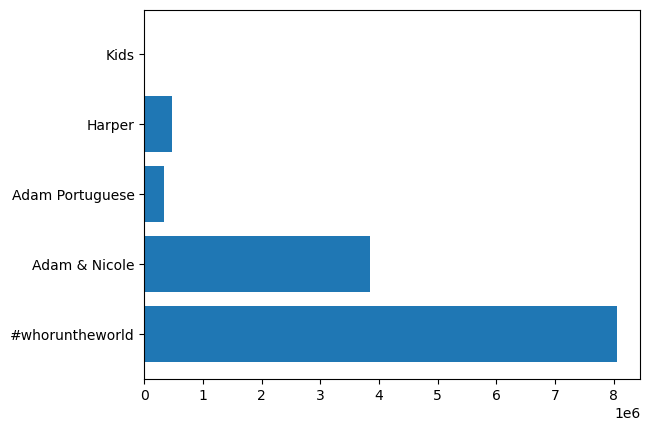

In [16]:

plt.barh(*zip(*viewTime.items()))
plt.show()

#### What is the average watching time (per Profile)?

In [17]:
for profile in df['Profile Name'].unique():
    (df.loc[df['Profile Name']==f'{profile}','Duration'].sum()/(df.loc[df['Profile Name']==f'{profile}'].value_counts())).mean()

In [18]:
df['Supplemental Video Type'].value_counts()

HOOK              537
TRAILER           278
PROMOTIONAL        78
TEASER_TRAILER     45
CINEMAGRAPH         9
RECAP               5
Name: Supplemental Video Type, dtype: int64

In [19]:
df = df.loc[df['Supplemental Video Type'].isnull()]

In [20]:
df['Profile Name'].value_counts()

#whoruntheworld    5093
Adam & Nicole      2236
Adam Portuguese     482
Harper              436
Kids                  8
Name: Profile Name, dtype: int64

### What devices are used by which Profile? Which device is used the most?

In [21]:
df['Device Type'].value_counts()

DefaultWidevineAndroidPhone                     2949
Google Chromecast V3 Streaming Stick            2799
Android DefaultWidevineL3Phone Android Phone    1740
Netflix Windows App - Cadmium Windows Mobile     419
Samsung 2015 NT14M DTV Smart TV                   93
Google Smart Display Nest Hub 2018                88
Google Chromecast streaming stick                 72
Chrome PC (Cadmium)                               65
Firefox PC (Cadmium)                              26
Edge OSS - Windows (Cadmium)                       4
Name: Device Type, dtype: int64

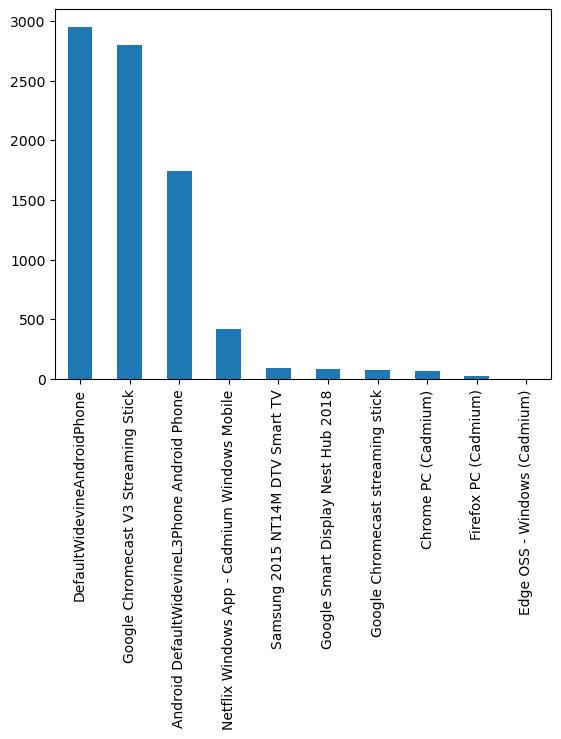

In [22]:
df['Device Type'].value_counts().plot(kind='bar')
plt.show()

### What was the most popular/watched title?

In [29]:
df.groupby('Title').sum().sort_values('Duration', ascending=False)

C:\Users\kellya\AppData\Local\Temp\ipykernel_21740\3621132479.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df.groupby('Title').sum().sort_values('Duration', ascending=False)


,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
Title,,,,,,,,
Charlie's Angels,#whoruntheworld#whoruntheworld#whoruntheworld#...,1 days 02:04:35,0,0,DefaultWidevineAndroidPhoneDefaultWidevineAndr...,00:16:2001:47:4201:41:4701:12:1700:41:2100:47:...,00:16:20Not latest viewNot latest view01:12:17...,CA (Canada)CA (Canada)CA (Canada)CA (Canada)CA...
6 Underground,#whoruntheworld#whoruntheworld#whoruntheworld#...,0 days 22:52:57,0,0,DefaultWidevineAndroidPhoneDefaultWidevineAndr...,02:04:1302:05:3102:04:3301:13:1402:06:1002:05:...,02:04:13Not latest viewNot latest viewNot late...,"KR (Korea, Republic of)CA (Canada)CA (Canada)C..."
The Man from U.N.C.L.E.,#whoruntheworld#whoruntheworld#whoruntheworld#...,0 days 19:44:12,0,0,DefaultWidevineAndroidPhoneDefaultWidevineAndr...,00:51:0000:50:2400:35:2500:49:3201:46:1600:31:...,00:51:00Not latest viewNot latest viewNot late...,"KR (Korea, Republic of)KR (Korea, Republic of)..."
Ghostbusters: Answer the Call,#whoruntheworld#whoruntheworld#whoruntheworld#...,0 days 19:35:59,0,0,DefaultWidevineAndroidPhoneDefaultWidevineAndr...,01:52:5601:15:5700:27:2501:32:5701:16:5500:55:...,01:52:56Not latest viewNot latest viewNot late...,"KR (Korea, Republic of)KR (Korea, Republic of)..."
The Old Guard,#whoruntheworld#whoruntheworld#whoruntheworld#...,0 days 18:56:29,0,0,Google Chromecast V3 Streaming StickGoogle Chr...,02:05:4001:21:4300:00:0101:57:0501:16:1001:16:...,02:05:40Not latest viewNot latest viewNot late...,US (United States)US (United States)US (United...
...,...,...,...,...,...,...,...,...
Paranoid: Season 1: Episode 1,#whoruntheworld,0 days 00:00:01,0,0,DefaultWidevineAndroidPhone,00:00:00,00:00:00,US (United States)
The Adam Project,#whoruntheworld,0 days 00:00:01,0,0,DefaultWidevineAndroidPhone,00:00:25,00:00:25,US (United States)
The Ranch: Part 2: Sittin' on the Fence (Episode 3),Adam & Nicole,0 days 00:00:01,0,0,Google Chromecast V3 Streaming Stick,00:00:01,00:00:01,US (United States)


In [ ]:
dff['Title'].value_counts().nlargest(10).plot(kind='bar')
plt.show()